## Simulation und Modellierung WS16/17
### Uebung 09

### Aufgabe 01: Oberflaechen Plots

Wenn sich die Punkte $\vec{r}=\vec{r}(p,q)$ einer Flaeche als Funktion von zwei verallgemeinerten Koordinaten $p\in[p_{min},p_{max}]$ sowie $q\in[q_{min},q_{max}]$ parametrisieren lassen, dann kann man diese Flaeche in einem 3-dimensionalen `mplot3d` Plot darstellen.

Finden Sie geeignete Parametrisierungen der folgenden Flaechen, und plotten diese in 3d als Wireframe- oder Surface Plots mit geeigneter Farbskala `cmap` oder individuellen `facecolors` :

- Kugeloberflaeche
- Torus
- <a href="https://moodle2.uni-potsdam.de/%22https://en.wikipedia.org/wiki/M%C3%B6bius_strip/%22">Moebiusband</a>


In [ ]:
%matplotlib inline
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

Lp = 200
Lq = 200

# Kugeloberflaeche
p1 = np.linspace(0, 2*np.pi, Lp)
q1 = np.linspace(0, np.pi, Lq)
P1, Q1 = np.meshgrid(p1, q1)  # (P[i, j], Q[i, j]) = (p[i], q[j])
x1 = np.cos(P1)*np.sin(Q1)  # x[i, j] = x(p[i], q[j])
y1 = np.sin(P1)*np.sin(Q1)
z1 = np.cos(Q1)

fig1 = figure()
ax3d1 = fig1.add_subplot(111, projection='3d', aspect=1)
ax3d1.plot_surface(x1, y1, z1, cmap = 'summer', alpha = 0.5)
ax3d1.set_xlim([-1, 1])
ax3d1.set_ylim([-1, 1])
ax3d1.set_zlim([-1, 1])
ax3d1.set_title('Kugel')
axis('square')
show()

# Torus
p2 = np.linspace(0, 2*np.pi, Lp)
q2 = np.linspace(0, 2*np.pi, Lq)
P2, Q2 = np.meshgrid(p2, q2)
x2 = (2*np.cos(P2) + 3)*np.cos(Q2)
y2 = (2*np.cos(P2) + 3)*np.sin(Q2)
z2 = 2*np.sin(P2)

fig2 = figure()
ax3d2 = fig2.add_subplot(111, projection='3d', aspect=1)
ax3d2.plot_surface(x2, y2, z2, cmap = 'brg', alpha = 0.6)
ax3d2.set_xlim([-5, 5])
ax3d2.set_ylim([-5, 5])
ax3d2.set_zlim([-5, 5])
ax3d2.set_title('Torus')
show()

# Moebiusband
p3 = np.linspace(-1/3, 1/3, Lp)
q3 = np.linspace(0, 2*np.pi, Lq)
P3, Q3 = np.meshgrid(p3, q3)
x3 = np.cos(Q3) + P3*np.cos(Q3/2)*np.cos(Q3)
y3 = np.sin(Q3) + P3*np.cos(Q3/2)*np.sin(Q3)
z3 = P3*np.sin(Q3/2)

fig3 = figure()
ax3d3 = fig3.add_subplot(111, projection='3d', aspect=1)
ax3d3.plot_surface(x3, y3, z3, cmap = 'jet', alpha = 0.6)
ax3d3.set_xlim([-2, 2])
ax3d3.set_ylim([-2, 2])
ax3d3.set_zlim([-0.5, 0.5])
ax3d3.set_title('Moebiusband')
axis('square')

show()

**Zusatzaufgabe :** Schreiben Sie eine Funktion `Tknot(p,q,R=2,r=1,h=0.1,Lp=200,Lq=200)`, welche einen Schlauch um einen<a href="https://moodle2.uni-potsdam.de/%22/%22">`(p,q)` Torusknoten</a> auf einem Torus mit Radius `R`, Torusschlauchradius `r` und Torusknotenschlauchradius `h` zeichnet. (Der 1d Torusknoten hat nur eine verallgemeinerte Koordinate. Die andere parametrisiert einen senkrechten Ring in Abstand `h` um den Torusknoten)

### Aufgabe 02 : Newton Fraktale

- Schreiben Sie eine Funktion 
`Newton_Steps(x0,f,fprime,dmin=1e-15,dmax=1e3,Nmax=100)` welche das Newton Verfahren mit der Funktion `f(x)` und deren Ableitung `fprime(x)` beginnend bei $x_0$ solange ausfuehrt bis $\left|f(x_n)\right|\le d_{min}$, $\left|f(x_n)\right|\ge d_{max}$ oder $n=N_{max}$ und den Wert $x_n$ der Nullstellen-Naeherung sowie die Zahl $n$ der notwendigen 
Iterationsschritte ausgibt.

- Bestimmen Sie fuer alle *komplexen* Anfangswerte $z =x+iy $ auf einem geeigneten Gitter die Approximation der von dort gefundenen Nullstellen der Funktion $f(z)=z^3-1$ und die Zahl der benoetigten Iterationsschritte. Berechnen Sie aus diesen Werten geeignete `[r,g,b]` Farben oder eine skalare Funktion und plotten Sie diese mit `imshow` ueber dem Gitter.

Hinweis : Wenn Sie die Funktionen `Newton_Steps`, `f` und `fprime` sorgfaeltig programmieren, koennen diese direkt auf ein ganzes `numpy` Feld von Anfangswerten gleichzeitig angewendet werden ohne Python Schleifen zu verwenden.

In [19]:
def Newton_Steps(x0, f, fprime, dmin=1e-15, dmax=1e3, Nmax=100):
    '''
    approximiert Nullstellen der Funktion f nach Newton & Raphson
    #
    Argumente:
    x0 = (numpy-)Feld von Anfangswerten
    zeros_of_f = vorgegebe Nullstellen der Funktion, zum spaeteren Einfaerben
    f = Funktion mit Nullstellen
    fprime = Ableitung von f
    dmin = unteres Abbruchkriterium
    dmax = oberes Abbruchkriterium
    Nmax = maximale Iterationszahl
    #
    Ausgabe: Liste [xn, N, which_zero], xn = appr. Nullstelle, N = Anzahl Iterationen
    '''
    #lieber schreiben, dass diese Fkt numpy als np voraussetzt
    x0 = np.array(x0)
    N = np.zeros(x0.shape, dtype=np.int)  # zaehlt Iterationen
    which_zero = np.zeros(x0.shape, dtype=np.int)  # 0,1 or 2 = welche Nst. wurde gefunden
    # Newton-Raphson-Schritt
    nr_step = lambda x: x-f(x)/fprime(x) #sehr cool, wenn auch die Bezeichnung etwas fragwuerdig ist!
    for i in range(Nmax):
        # Bool-Array, True wo keine Abbruchbedingung
        ix = (abs(f(x0))<dmax)*(abs(f(x0))>dmin)*(fprime(x0)!=0) #sehr gut.
        if np.any(ix):
            # Durchgang der Iteration
            N = np.where(ix==True, i+1, N)
            x0[ix] = nr_step(x0[ix])
        else:
        # Abbruchbedingungen fuer alle Werte erfuellt
            break
    
    # Ausgabe
    return([x0, N])


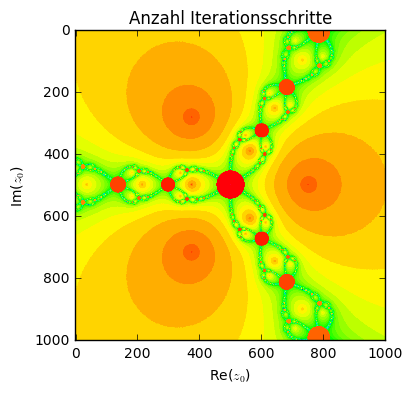

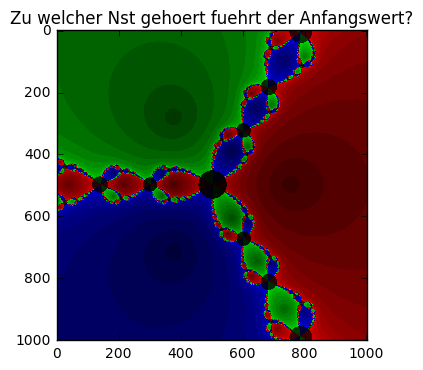

In [41]:
import numpy as np

N = 1001
Z = []
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
for i in range(N):
    Z.append(x[i]+1j*y[:])

out = Newton_Steps(Z, lambda z: z**3-1, lambda z: 3*z**2, dmax=1e3, Nmax=100)

# es gibt zwei Dinge, die du in der Farbskala verstecken kannst: wieviele Iterationsschritte brauche ich 
# oder zu welcher Nst gehoert mein Anfangswert.
import matplotlib.pyplot as plt # das kommt eigentlich an den Anfang des Programms
%matplotlib inline

f0, ax0 = plt.subplots()
ax0.set_title('Anzahl Iterationsschritte')
ax0.set_xlabel(r'Re($z_0$)')
ax0.set_ylabel(r'Im($z_0$)')
ax0.imshow(out[1].T, cmap = 'gist_rainbow') # .T damit Real Abszisse und Imag Ordinate

f1, ax1 = plt.subplots()
ax1.set_title('Zu welcher Nst gehoert fuehrt der Anfangswert?')

#analytisch berechnete Nst: (Nst z=1 erraten, dann z**3-1 durch z-1 teilen)
#und Anzahl der Iterationsschritte als Grauskala
zeros_of_f = [1 + 0*1j, -0.5 - np.sqrt(3.)/2.*1j, -0.5 + np.sqrt(3.)/2.*1j]


max_i = np.max(out[1]) #maximale Iterationsschritte
rgb_img = [[0 for i in range(N)]  for j in range(N)] # leeres Feld fuer Farben
for i in range(N): 
    for j in range(N):
        which_zero = np.argmin(abs(zeros_of_f-out[0][i][j])) # Teste, welche der drei Nst am Naechsten liegt
        a = np.zeros(3) 
        a[which_zero] = out[1][i][j]/(max_i-20) # Grauskala
        rgb_img[j][i] = (a[0], a[1], a[2]) # rot blau oder gruen
        
ax1.imshow(rgb_img)

*Das mit den Farben hat nicht so gut funktioniert... Es gibt zwar Unterschiede in den Nullstellen, die von den drei Bereichen angenähert werden, aber die Funktion spuckt ausserdem extrem hohe Werte aus, die dann die Farbskala fuer sich beanspruchen. So zumindest mein Erklaerungsversuch.*

#### Zusatzaufgabe :

- Definieren Sie eine Funktion `polymaker(c)` welche bei einem gegebenen iterierbaren Container `c` mit Nullstellen $c_i$ die Funktion `f(x)`$=\prod_i (x-c_i)$ und deren Ableitung `fprime(x)`$=\sum_i \prod_{j\ne i} (x-c_j)$ dynamisch generiert und als Funktionsobjekte zurueckliefert.

- Plotten Sie Beispiele fuer Newton Fraktale von verschiedenen Funktionen, die Sie mit `polymaker(c)` erzeugen.